In [133]:
# 由于在data- exploration的关系热力图显示贷款审批与否和 收入（-0.14），信用评分（-0.35），DTI率（0.17）
# 我想还是通过数据来预测贷款审批与否，文本可以通过大模型的相似度匹配，在确认相似的文本中，
# 贷款的用途（分类时的预测类别），来缩小样本后，在对相关性的数据进行模型预测
import pandas

df = pandas.read_csv('data/loan_data_with_sentiment_analysis.csv')

In [134]:
df.head(3)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,id,tagged_text,predicted_category,anger,disgust,fear,joy,sadness,surprise,neutral
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected,0,0 I need a loan to pay for an international va...,Travel,0.032620,0.009153,0.066997,0.023172,0.834439,0.003592,0.030028
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected,1,1 I want to make home improvements like instal...,Other,0.028483,0.019443,0.011550,0.083611,0.383042,0.026668,0.447203
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected,2,"2 I need a loan for home renovation, including...",Renovation,0.026961,0.032717,0.055367,0.033183,0.299088,0.033726,0.518959


In [135]:
# “批准”列是我们的目标，目前是一个字符串。让我们把它编码为一个数字二进制变量。
# 1表示批准，0表示拒绝。
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Approval_Label'] = le.fit_transform(df['Approval'])
df['Approval_Label'] = df['Approval_Label'].replace({0: 1, 1: 0})

In [136]:
df.head(3)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,id,tagged_text,predicted_category,anger,disgust,fear,joy,sadness,surprise,neutral,Approval_Label
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected,0,0 I need a loan to pay for an international va...,Travel,0.032620,0.009153,0.066997,0.023172,0.834439,0.003592,0.030028,0
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected,1,1 I want to make home improvements like instal...,Other,0.028483,0.019443,0.011550,0.083611,0.383042,0.026668,0.447203,0
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected,2,"2 I need a loan for home renovation, including...",Renovation,0.026961,0.032717,0.055367,0.033183,0.299088,0.033726,0.518959,0


In [137]:
# 利用线性回归模型，预测贷款审批与否
validation_data = df[['id','Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Approval_Label']]

meta_approval_data = df[df['Approval_Label'] == 1]
meta_approval_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3933 entries, 4 to 23999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Text                3933 non-null   object 
 1   Income              3933 non-null   int64  
 2   Credit_Score        3933 non-null   int64  
 3   Loan_Amount         3933 non-null   int64  
 4   DTI_Ratio           3933 non-null   float64
 5   Employment_Status   3933 non-null   object 
 6   Approval            3933 non-null   object 
 7   id                  3933 non-null   int64  
 8   tagged_text         3933 non-null   object 
 9   predicted_category  3933 non-null   object 
 10  anger               3933 non-null   float64
 11  disgust             3933 non-null   float64
 12  fear                3933 non-null   float64
 13  joy                 3933 non-null   float64
 14  sadness             3933 non-null   float64
 15  surprise            3933 non-null   float64
 16  neutral   

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
from sklearn.model_selection import train_test_split

df = validation_data
X = df[['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']]
y = df['Approval_Label']

# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练逻辑回归模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 打印分类报告
print(classification_report(y_test, y_pred))

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

Accuracy: 0.8419444444444445
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6068
           1       0.49      0.24      0.32      1132

    accuracy                           0.84      7200
   macro avg       0.68      0.60      0.62      7200
weighted avg       0.81      0.84      0.82      7200

Accuracy of the Logistic Regression model: 0.8419


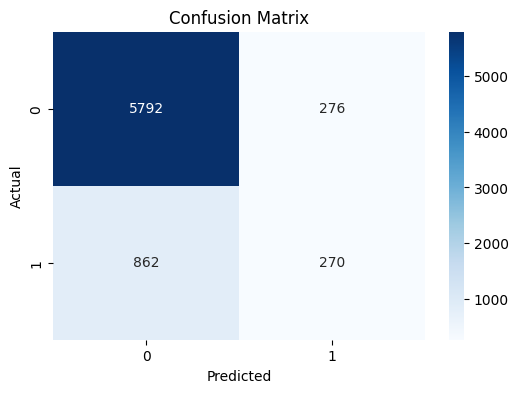

In [142]:
# 使用热图绘制混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()